In [18]:
%matplotlib inline

import numpy as np
from scipy.misc import ascent
from theano import tensor as T, function
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D


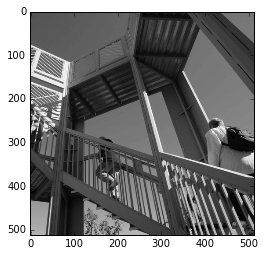

In [19]:
img = ascent()
plt.imshow(img, cmap='gray')

I = img.reshape((1, 1, img.shape[0], img.shape[1]))

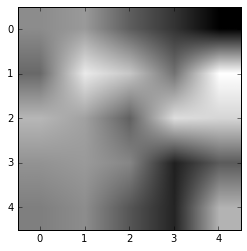

In [20]:
w = np.random.randn(1, 1, 5, 5)
plt.imshow(w[0, 0], cmap='gray')

In [21]:
X, W = T.tensor4s('X', 'W')
Y = T.nnet.conv.conv2d(X, W, 
                       border_mode='valid', 
                       image_shape=I[:1].shape, 
                       filter_shape=w.shape)
F = function([X, W], Y, allow_input_downcast = True)
                       

In [22]:
I.shape

(1, 1, 512, 512)

(1, 1, 508, 508)


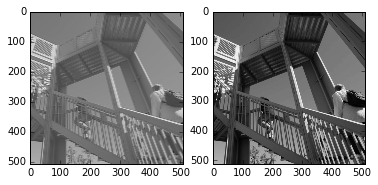

In [24]:
out = F(I, w)

print(out.shape)
plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

In [25]:
nb_output_chan = 1
nb_rows = 5
nb_cols = 5
pool_row = 8
pool_col = 8

model = Sequential()
model.add(Convolution2D(nb_output_chan, nb_rows, nb_cols, border_mode='valid', input_shape=I.shape[1:]))
model.add(MaxPooling2D(pool_size=(pool_row, pool_col)))

model.compile(loss='mse', optimizer='sgd')

In [ ]:
out = model.predict(I)
plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow